# MNIST 손글씨 - Neural Network

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, X_test.shape, y_train.shape

((60000, 28, 28), (10000, 28, 28), (60000,))

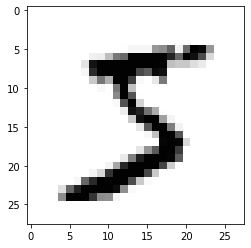

In [5]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
import sys
for row in X_train[0]:
    for i in row:
        sys.stdout.write(f'{i:3d} ')
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [7]:
# 2차원 데이터(28x28)를 1차원으로(784)
X_train = X_train.reshape(-1, 784)

In [8]:
# 0 ~ 1 사이의 값으로 정규화 
X_train = X_train / 255.0
X_train.shape

(60000, 784)

In [9]:
# X_test 에 대해서도 동일하게 처리
X_test = X_test.reshape(-1, 784)
X_test = X_test / 255.0
X_test.shape

(10000, 784)

In [10]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [11]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 모델 정의, 설정, 학습

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [14]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [15]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# 모델 최적화
model_path = MODEL_DIR + 'best-mnist-dnn.hdf5'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', 
                             verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=50, batch_size=200, verbose=0,
                    callbacks=[checkpoint, early_stopping])


Epoch 00001: val_loss improved from inf to 0.17144, saving model to ./model/best-mnist-dnn.hdf5

Epoch 00002: val_loss improved from 0.17144 to 0.12332, saving model to ./model/best-mnist-dnn.hdf5

Epoch 00003: val_loss improved from 0.12332 to 0.10247, saving model to ./model/best-mnist-dnn.hdf5

Epoch 00004: val_loss improved from 0.10247 to 0.08734, saving model to ./model/best-mnist-dnn.hdf5

Epoch 00005: val_loss improved from 0.08734 to 0.08358, saving model to ./model/best-mnist-dnn.hdf5

Epoch 00006: val_loss did not improve from 0.08358

Epoch 00007: val_loss improved from 0.08358 to 0.07434, saving model to ./model/best-mnist-dnn.hdf5

Epoch 00008: val_loss did not improve from 0.07434

Epoch 00009: val_loss improved from 0.07434 to 0.07222, saving model to ./model/best-mnist-dnn.hdf5

Epoch 00010: val_loss did not improve from 0.07222

Epoch 00011: val_loss did not improve from 0.07222

Epoch 00012: val_loss did not improve from 0.07222

Epoch 00013: val_loss did not improv

In [19]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)

In [20]:
# 정확도
acc = best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0650 - accuracy: 0.9789


In [21]:
print(f'정확도: {acc[1]:.4f}')

정확도: 0.9789


### 훈련과정 시각화

In [22]:
# 훈련셋과 검증셋의 오차
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

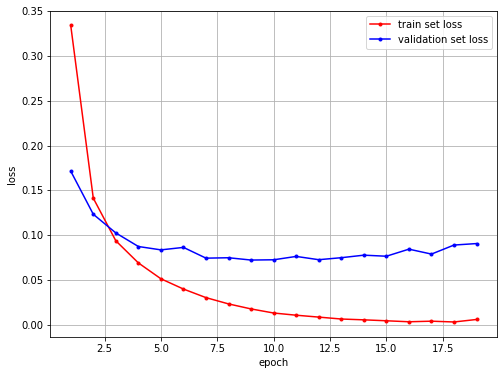

In [25]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_loss, c='red', marker='.', label='train set loss')
plt.plot(x_len, y_vloss, c='blue', marker='.', label='validation set loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()